# Check Emotion Labeled Datset

The main objective of this notebook is to show the analysis about the emotion labeled dataset

In [1]:
import os
import pandas as pd
from pathlib import Path

In [3]:
dataset_path = Path('../datasets/emotion_recognition/emotions_189416.csv').resolve()

In [4]:
dataset = pd.read_csv(dataset_path)

In [5]:
dataset.head()

,label,date,id,text,user
0,joy,2019-10-10 18:33:37,1182363570807418880,@cw_spn #excited for tonight's #premiere. #sup...,KWimerAuthor
1,joy,2019-10-10 18:33:41,1182363589551759360,Very best of luck to Maebh Costello and our ve...,JOHANNA_MURPHY
2,joy,2019-10-10 18:37:05,1182364446116794369,@Yfielding Oh sounds good......#excited,gingercurlies87
3,joy,2019-10-10 18:39:03,1182364938364436480,#excited all the way in #Universal #Orlando ht...,_SteveHughes_
4,joy,2019-10-10 18:40:28,1182365294842527744,Might be purchasing my first gaming PC today a...,TinkTribe


In [6]:
import seaborn as sns

## Label count

Check the count of each label

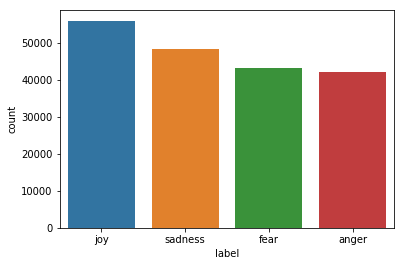

In [7]:
sns.countplot(x='label', data=dataset)

## Preprocess

Preprocess the text before proceding with the analysis

In [12]:
# Add project path to the PYTHONPATH

import os
import sys
from pathlib import Path

sys.path.append(Path(os.path.join(os.path.abspath(''), '../')).resolve().as_posix())

In [13]:
from nlp.utils import preprocess

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rmohashi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
dataset['cleaned_text'] = preprocess(dataset.text)

Time to clean up: 73.05 sec


## Text length

Check the length of the tweets

In [16]:
# Tweets with the new char count

len(dataset[dataset.text.apply(lambda text: len(text)) > 140])

45080

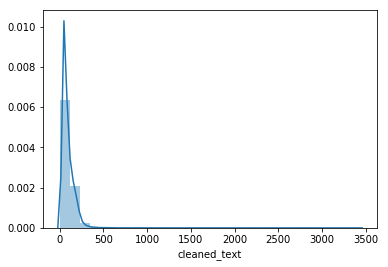

In [19]:
sns.distplot(dataset.cleaned_text.apply(lambda text: len(text)), bins=30)

## Word count

Check the word count

In [20]:
dataset.cleaned_text.apply(lambda text: len(text.split())).max()

138

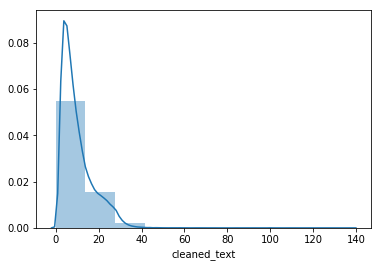

In [52]:
sns.distplot(dataset.cleaned_text.apply(lambda text: len(text.split())), bins=10)

In [83]:
len(dataset[dataset.cleaned_text.apply(lambda text: len(text.split())) > 30])

2497

In [84]:
dataset[dataset.cleaned_text.apply(lambda text: len(text.split())) == 30].iloc[1].cleaned_text

'hah ha writingcommunity novels ready plus epic collection poetry start publishing amazon wahoo exciting st goes tomoz watch space lovely lot ek :star struck: :beaming_face_with_smiling_eyes: :red_heart: livingthedream cantstopwontstop writerslife excited'

In [85]:
filtered_dataset = dataset[dataset.cleaned_text.apply(lambda text: len(text.split())) <= 30]

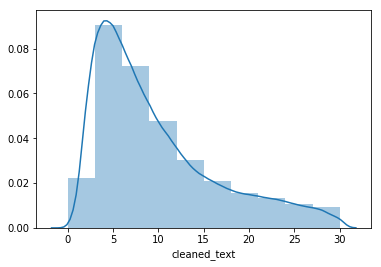

In [86]:
sns.distplot(filtered_dataset.cleaned_text.apply(lambda text: len(text.split())), bins=10)

In [59]:
len(dataset[dataset.cleaned_text.apply(lambda text: len(text.split())) < 5])

46311

In [87]:
dataset[dataset.cleaned_text.apply(lambda text: len(text.split())) == 5].iloc[0].cleaned_text

'got job library blessed excited'